<img src="https://2.bp.blogspot.com/-nwuCSqykPh4/XJ40CXkkC_I/AAAAAAAAAB4/S3U2Mugv5x8cciG7QzAPD_YMyVWMMmZlgCK4BGAYYCw/s1600/logo-mediano_0.png" width="200" heigth="400" align= "right"/>

## Universidad Galileo	
### IIO. Instituto en Investigación de Operaciones
### Maestría: Data Scientist
### Curso: Ciencia de Datos en Python, Seccion U
### Catedrático: Ing. Preng Biba

### Proyecto 1

### Librerías a utilizar:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LinearRegression
style.use('ggplot')

### Como parte de la ejecución del proyecto se procede a la carga de los datos

In [2]:
# Esto me permite cargar datos en formato binario
datos = np.load('proyecto_training_data.npy')
print(datos.shape)

(1460, 6)


### 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validaci´ony pruebas(20 %).

In [3]:
# Con esto obtenemos el número de filas
num_filas = datos.shape[0]

#calculamos el 80% de las filas totales
train_size = int(num_filas * 0.8)

#Hacemos la elección de las primneras filas, usando slicing.
#Estas filas se asignan al conjunto de entrenamiento
train_data = datos[:train_size]
test_data = datos[train_size:]

print(train_data.shape)
print(test_data.shape)

(1168, 6)
(292, 6)


### Datos segun las indicaciones del data fields

In [9]:
columnas = ['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']

# SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

# OverallQual: Overall material and finish quality, rates the overall material and finish of the house

# 1stFlrSF: First Floor square feet

# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

# YearBuilt: Original construction date

# LotFrontage: Linear feet of street connected to property

data = pd.DataFrame(datos, columns=columnas)
train = pd.DataFrame(train_data, columns=columnas)
train_data_df = pd.DataFrame(train_data, columns=columnas)
test = pd.DataFrame(test_data, columns=columnas)

### Detalles

In [7]:
data.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


### 3. Análisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas):
### 1 media.
### 2 valor m´aximo.
### 3 valor m´ınimo.
### 4 rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1). 
### 5 desviacióon estándar.

In [10]:
medias = train_data_df.mean()
maximos = train_data_df.max()
minimos = train_data_df.min()
rango_p2p = maximos - minimos
desviacion_estandar = train_data_df.std()

print("Medias:\n", medias)
print("\nMáximos:\n", maximos)
print("\nMínimos:\n", minimos)
print("\nRango P2P:\n", rango_p2p)
print("\nDesviación estándar:\n", desviacion_estandar)

Medias:
 SalePrice       180590.277397
OverallQual          6.101027
1stFlrSF          1156.323630
TotRmsAbvGrd         6.485445
YearBuilt         1971.451199
LotFrontage         69.946985
dtype: float64

Máximos:
 SalePrice       755000.0
OverallQual         10.0
1stFlrSF          3228.0
TotRmsAbvGrd        14.0
YearBuilt         2010.0
LotFrontage        313.0
dtype: float64

Mínimos:
 SalePrice       34900.0
OverallQual         1.0
1stFlrSF          334.0
TotRmsAbvGrd        2.0
YearBuilt        1875.0
LotFrontage        21.0
dtype: float64

Rango P2P:
 SalePrice       720100.0
OverallQual          9.0
1stFlrSF          2894.0
TotRmsAbvGrd        12.0
YearBuilt          135.0
LotFrontage        292.0
dtype: float64

Desviación estándar:
 SalePrice       78815.697902
OverallQual         1.378025
1stFlrSF          373.780374
TotRmsAbvGrd        1.609141
YearBuilt          29.951707
LotFrontage        23.478161
dtype: float64


C:\Users\cssbm\AppData\Local\Temp\ipykernel_23244\1597758198.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col], kde=False)


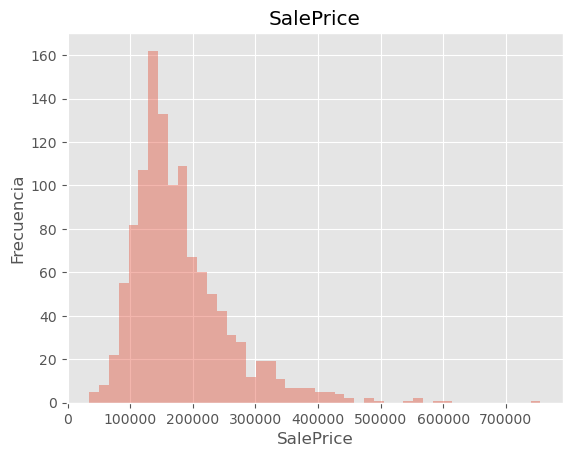

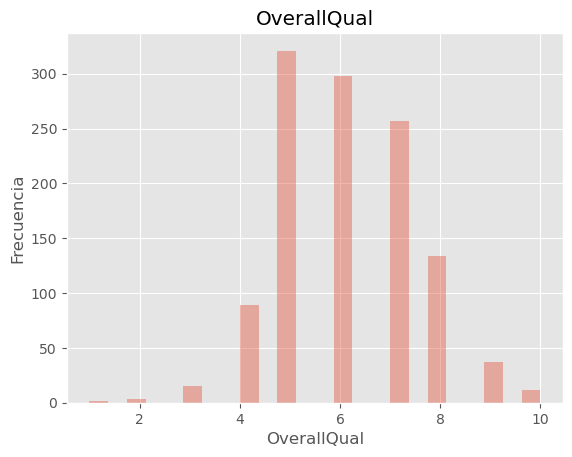

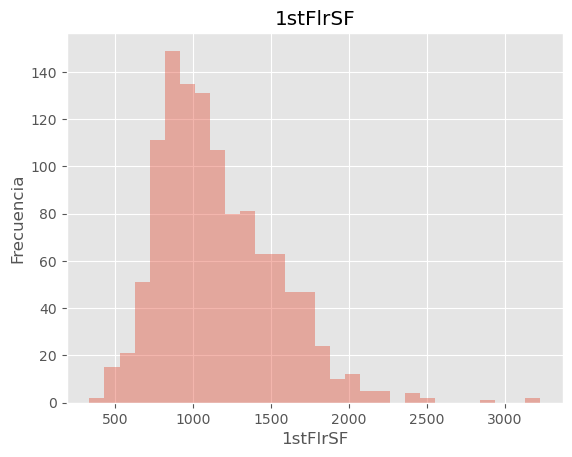

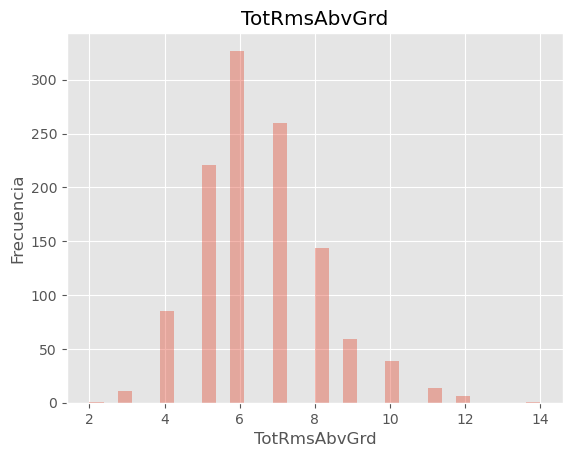

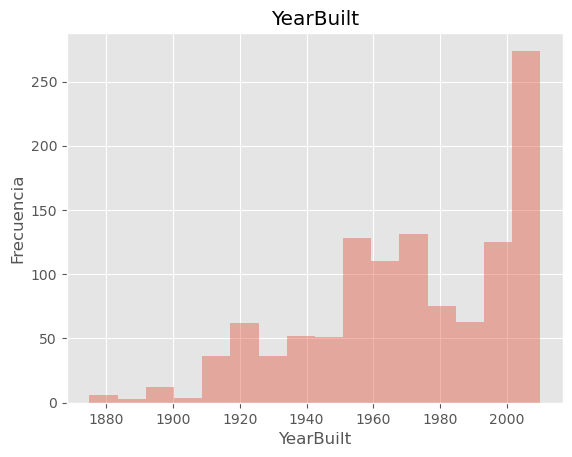

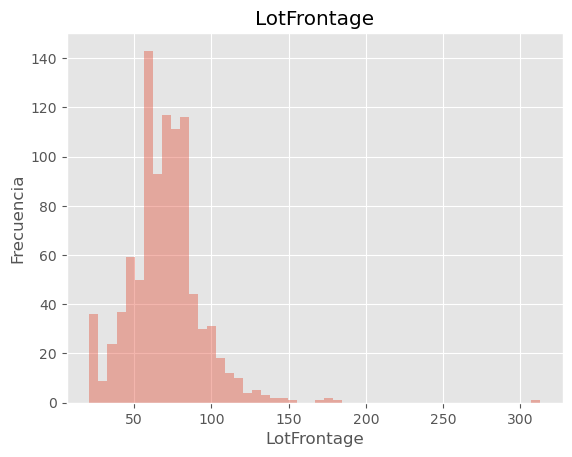

In [19]:
# Convertir el array a DataFrame
train_data = pd.DataFrame(train_data, columns=columnas)

# Obtener las columnas del DataFrame
train_columns = list(train_data.columns)

# Histogramas con seaborn
for col in columnas:
    sns.distplot(train_data[col], kde=False)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

### 5. Para cada variable independiente x :
### Calcular el coeficiente de correlación entre x y y.
### Graficar x vs y(scatterplot) usando matplotlib.
### Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica.
### Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables
### con más potencial predictivo es decir las 2 variables que presentan mayor correlación entre dicha variable y la variable dependiente

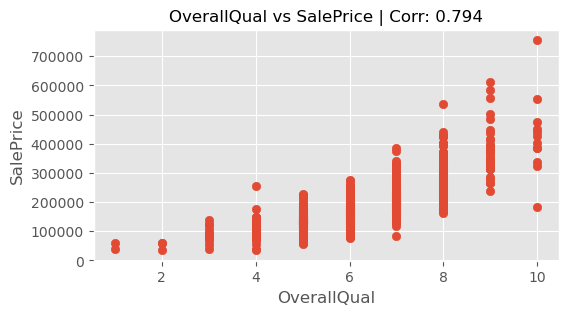

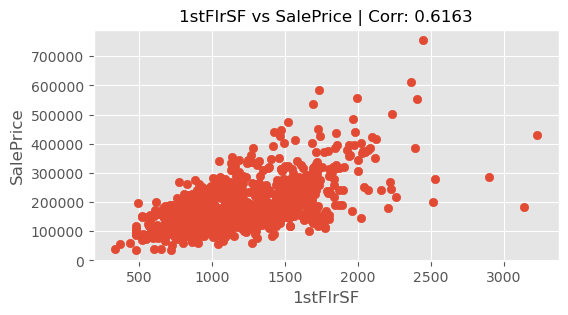

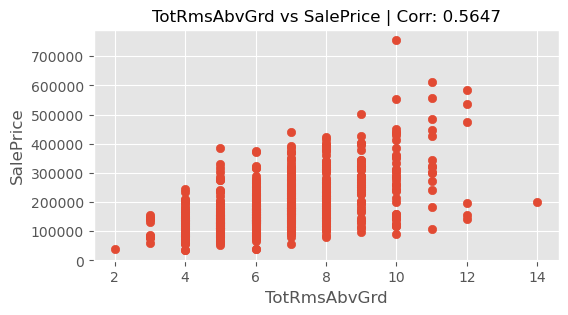

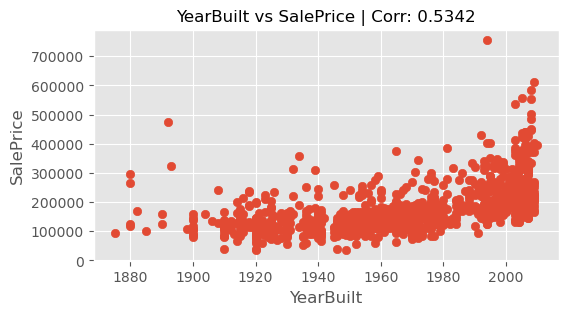

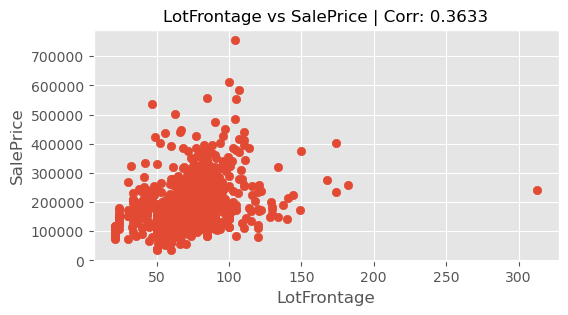

Las 2 variables con mayor potencial predictivo (nombre de columna, correlación): [('OverallQual', 0.794), ('1stFlrSF', 0.6163)]


In [21]:
def correlations_xy(data, x_dim, y_dim):
    x = data[x_dim]
    y = data[y_dim]

    # Correlación 
    corr = x.corr(y)

    # Gráfico
    plt.figure(figsize=(6, 3))
    plt.scatter(x, y)
    plt.xlabel(x_dim)
    plt.ylabel(y_dim)
    plt.title(f'{x_dim} vs {y_dim} | Corr: {round(corr, 4)}', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

    return round(corr, 4)

# Correlación y graficar para cada variable independiente x
correlations = []
for col in columnas[1:]:
    corr = correlations_xy(train_data_df, col, 'SalePrice')
    correlations.append((col, corr))

# Dos variables con mayor potencial predictivo
top_2_predictors = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)[:2]
print("Las 2 variables con mayor potencial predictivo (nombre de columna, correlación):", top_2_predictors)

### 6. Crear una función para entrenar un modelo de regresión lineal de una variable y = β0 +β1 ∗x.La función recibe como argumentos:
### 6.1 Vector con la variable independiente x,
### 6.2 Vector con la variable dependiente y,
### 6.3 un entero epochs que indica por cuantas iteraciones entrenar el modelo.
### 6.4 un entero imprimir error cada , que nos indica cada cuantas iteraciones queremosimprimir a trav´es de print: el nu´mero de iteración, el error del modelo en esa iteración, si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50.

In [24]:
train_OverallQual = train['OverallQual'].to_numpy()
train_1stFlrSF = train['1stFlrSF'].to_numpy()
train_SalePrice = train['SalePrice'].to_numpy()

In [108]:
class univ_linear_reg():
    def __init__(self, x, y, epoc=1000, imprimir_error_cada=100, learning_rate=0.001):
        self.imprimir_error_cada = imprimir_error_cada
        self.epoc = epoc
        self.learning_rate = learning_rate

        self.x = x
        self.y = y

        self.b0 = np.random.default_rng().normal(np.average(self.x), np.std(self.x))
        self.b1 = np.random.default_rng().normal(np.average(self.y), np.std(self.y))

        self.models = {}
        self.errores = []

        for i in range(self.epoc):
            y_pred = self.predictions(self.x)

            error = self.error_predictions(self.y, y_pred)
            self.errores.append(error)

            gradients = self.calculate_gradients(self.x, self.y, y_pred)
            self.b0 -= self.learning_rate * gradients[0]
            self.b1 -= self.learning_rate * gradients[1]

            self.models[i] = [np.array([[self.b1], [self.b0]]), y_pred, self.y, self.x]

            if i % self.imprimir_error_cada == 0:
                print('Iteración: ', i)
                print('Error: ', error)
                print("")

    def predictions(self, x):
        return self.b1 * x + self.b0

    @staticmethod
    def error_predictions(y_true, y_pred):
        return 1 / (2 * y_true.shape[0]) * np.sum((y_pred - y_true) ** 2)

    @staticmethod
    def calculate_gradients(x, y_true, y_pred):
        gradient_b1 = (1 / y_true.shape[0]) * np.sum((y_pred - y_true) * x)
        gradient_b0 = (1 / y_true.shape[0]) * np.sum(y_pred - y_true)
        return np.array([gradient_b0, gradient_b1])

    def get_trained_models(self):
        return self.models, np.array(self.errores)

    # Las funciones estáticas restantes permanecen igual


### El error en los entrenamientos de OverallaQual

In [86]:
x_train = train_OverallQual
y_train = train_SalePrice
epoc = 6001
imprimir_error_cada = 1200
learning_rate = 0.01

m1 = univ_linear_reg(x_train, y_train, epoc, imprimir_error_cada, learning_rate)
m1_models, m1_errores = m1.get_trained_models()


Iteración:  0
Error:  250164703532.89474

Iteración:  1200
Error:  1195830457.048113

Iteración:  2400
Error:  1162613113.1950598

Iteración:  3600
Error:  1151953453.7100303

Iteración:  4800
Error:  1148532700.3578227

Iteración:  6000
Error:  1147434958.5853884



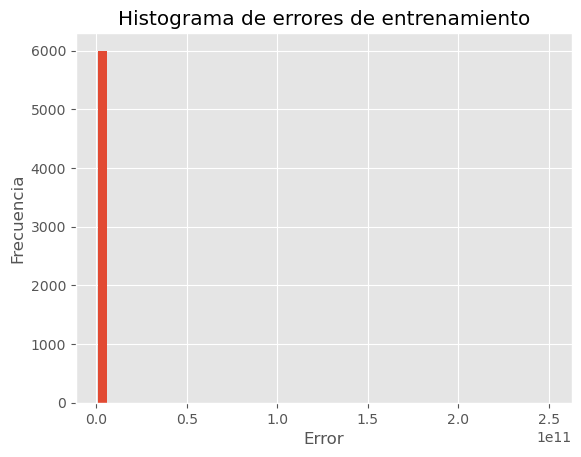

In [87]:
m1_models, m1_errors = m1.get_trained_models()

# Graficar el histograma
plt.hist(m1_errors, bins=50)
plt.title('Histograma de errores de entrenamiento')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

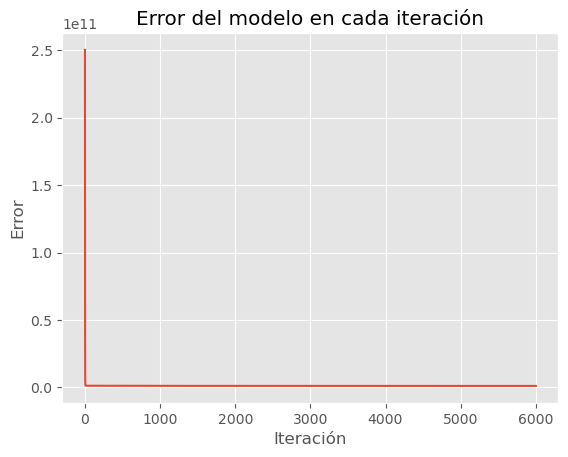

In [88]:
def plot_error(errors):
    plt.plot(errors)
    plt.title("Error del modelo en cada iteración")
    plt.xlabel("Iteración")
    plt.ylabel("Error")
    plt.show()
plot_error(m1_errors)

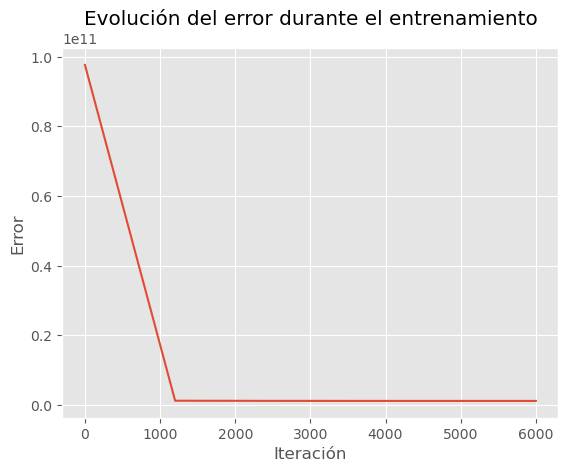

In [89]:
# Crear listas con las iteraciones y errores
iteraciones = [0, 1200, 2400, 3600, 4800, 6000]
errores = [97662907378.59819, 1204175729.1208463, 1165291164.7273793, 1152812857.6871867, 1148808488.6266584, 1147523460.8162937]

# Crear la figura y el eje
fig, ax = plt.subplots()

# Graficar los errores en función de las iteraciones
ax.plot(iteraciones, errores)

# Agregar etiquetas y título
ax.set_xlabel('Iteración')
ax.set_ylabel('Error')
ax.set_title('Evolución del error durante el entrenamiento')

# Mostrar la figura
plt.show()

Iteración:  0
Error:  1499606307105.32

Iteración:  10
Error:  1271186443.93805

Iteración:  20
Error:  1217046647.3457866

Iteración:  30
Error:  1216383637.5786083

Iteración:  40
Error:  1215728768.2632835

Iteración:  50
Error:  1215080072.467485

Iteración:  60
Error:  1214437491.9259958

Iteración:  70
Error:  1213800968.9903212

Iteración:  80
Error:  1213170446.5554197

Iteración:  90
Error:  1212545868.0545793



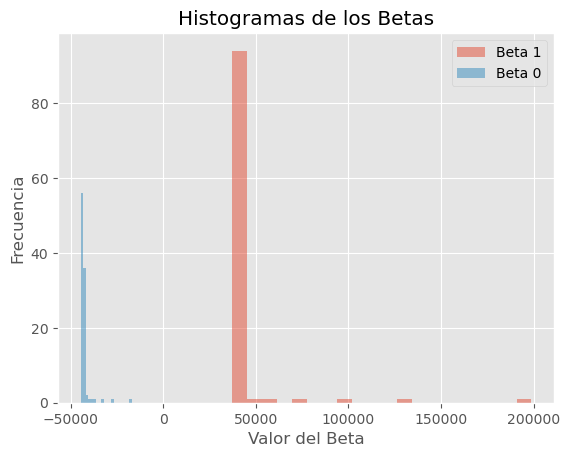

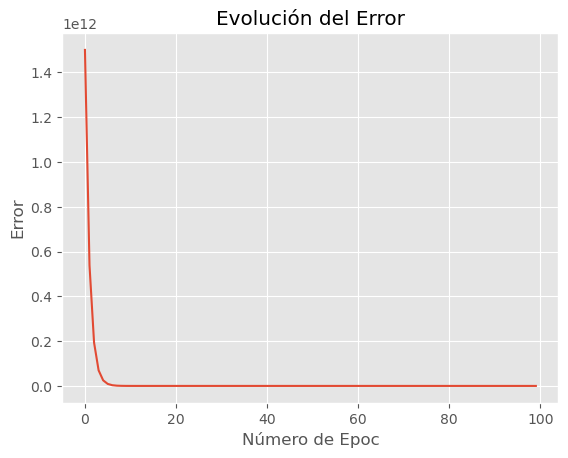

In [92]:
import matplotlib.pyplot as plt

# Entrenar modelo
m = univ_linear_reg(x_train, y_train, 100, 10, 0.01)

# Obtener los modelos entrenados y los errores
modelos, errores = m.get_trained_models()

# Obtener los betas de todos los modelos
betas = np.array([modelo[0] for modelo in modelos.values()])

# Graficar histogramas de los betas
plt.hist(betas[:, 0], bins=20, alpha=0.5, label='Beta 1')
plt.hist(betas[:, 1], bins=20, alpha=0.5, label='Beta 0')
plt.title('Histogramas de los Betas')
plt.xlabel('Valor del Beta')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Graficar la evolución del error a través de las épocas
plt.plot(errores)
plt.title('Evolución del Error')
plt.xlabel('Número de Epoc')
plt.ylabel('Error')
plt.show()

Iteración:  0
Error:  251203110807.50833

Iteración:  10
Error:  1306697667.2872252

Iteración:  20
Error:  1296357257.0002215

Iteración:  30
Error:  1294948161.2881138

Iteración:  40
Error:  1293552664.3802025

Iteración:  50
Error:  1292170322.8308291

Iteración:  60
Error:  1290801012.6131968

Iteración:  70
Error:  1289444610.8809614

Iteración:  80
Error:  1288100995.9458485

Iteración:  90
Error:  1286770047.2667422



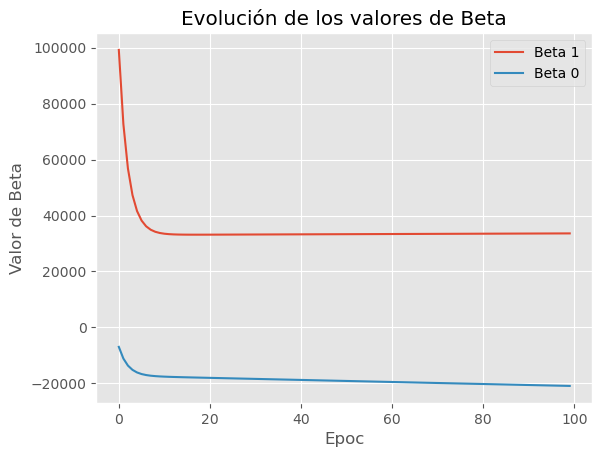

In [93]:
# Entrenar modelo
m = univ_linear_reg(x_train, y_train, 100, 10, 0.01)

# Obtener los modelos entrenados y los errores
modelos, errores = m.get_trained_models()

# Obtener los betas de todos los modelos
betas = np.array([modelo[0] for modelo in modelos.values()])

# Graficar la evolución de beta1 y beta0 a través de las épocas
fig, ax = plt.subplots()
ax.plot(betas[:, 0], label='Beta 1')
ax.plot(betas[:, 1], label='Beta 0')
ax.set_xlabel('Epoc')
ax.set_ylabel('Valor de Beta')
ax.set_title('Evolución de los valores de Beta')
ax.legend()
plt.show()

### Datos 1stFlrSF

In [95]:
m2 = univ_linear_reg(x_train, y_train, 51, 10, 0.000001)
m2_modelos, m2_errores = m2.get_trained_models()

Iteración:  0
Error:  4517000210.142725

Iteración:  10
Error:  4514473725.743242

Iteración:  20
Error:  4511949265.260584

Iteración:  30
Error:  4509426827.073287

Iteración:  40
Error:  4506906409.561206

Iteración:  50
Error:  4504388011.105489



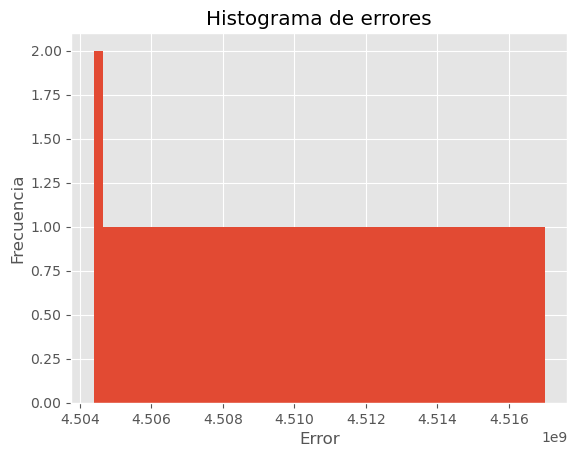

In [96]:
plt.hist(m2_errores, bins=50)
plt.title("Histograma de errores")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()


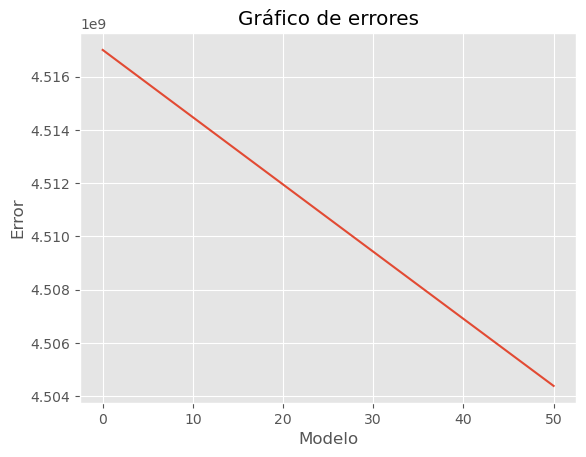

In [97]:
indices = np.arange(len(m2_errores))
plt.plot(indices, m2_errores)
plt.title("Gráfico de errores")
plt.xlabel("Modelo")
plt.ylabel("Error")
plt.show()


###  Esto significa que a medida que aumenta el tamaño del primer piso (1stFlrSF), también aumenta el precio de venta (SalePrice) en general. 

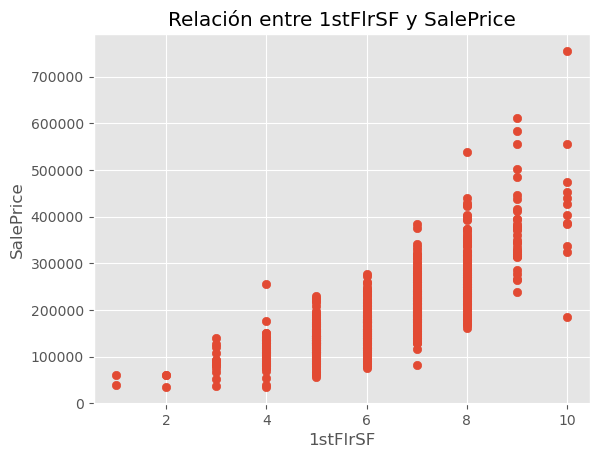

In [122]:
fig, ax = plt.subplots()
ax.scatter(x_train.squeeze(), y_train.squeeze())
ax.set_xlabel("1stFlrSF")
ax.set_ylabel("SalePrice")
ax.set_title("Relación entre 1stFlrSF y SalePrice")
plt.show()


### Modelo scikit-learn

### Modelo scikit-learn

In [123]:
from sklearn.linear_model import LinearRegression

# Ajustar modelo 1
m1 = LinearRegression().fit(train_OverallQual.reshape(-1,1), train_SalePrice)

# Ajustar modelo 2
m2 = LinearRegression().fit(train_1stFlrSF.reshape(-1,1), train_SalePrice)


In [136]:
# Cargar datos de prueba
test_data = np.load('proyecto_training_data.npy')

# Separar en variables predictoras y variable target
x_test = test_data[:, 1]  # Columna de OverallQual
y_test = test_data[:, -1]  # Columna de SalePrice


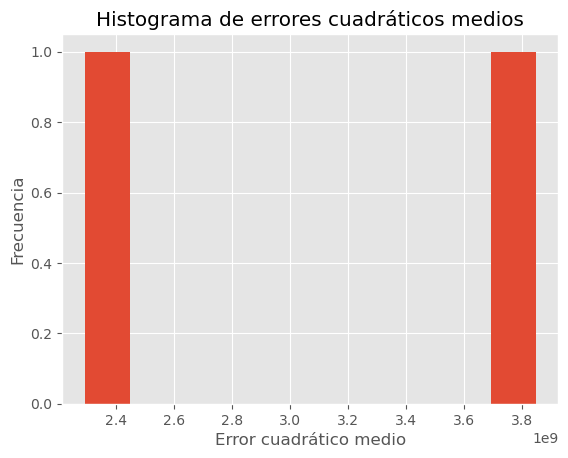

In [138]:
# Crear lista de errores cuadráticos medios
mse_list = [mse_m1, mse_m2]

# Graficar histograma
plt.hist(mse_list, bins=10)

# Agregar etiquetas y título
plt.xlabel('Error cuadrático medio')
plt.ylabel('Frecuencia')
plt.title('Histograma de errores cuadráticos medios')
plt.show()

In [139]:
print(x_test[:10])


[7. 6. 7. 7. 8. 5. 8. 7. 7. 5.]


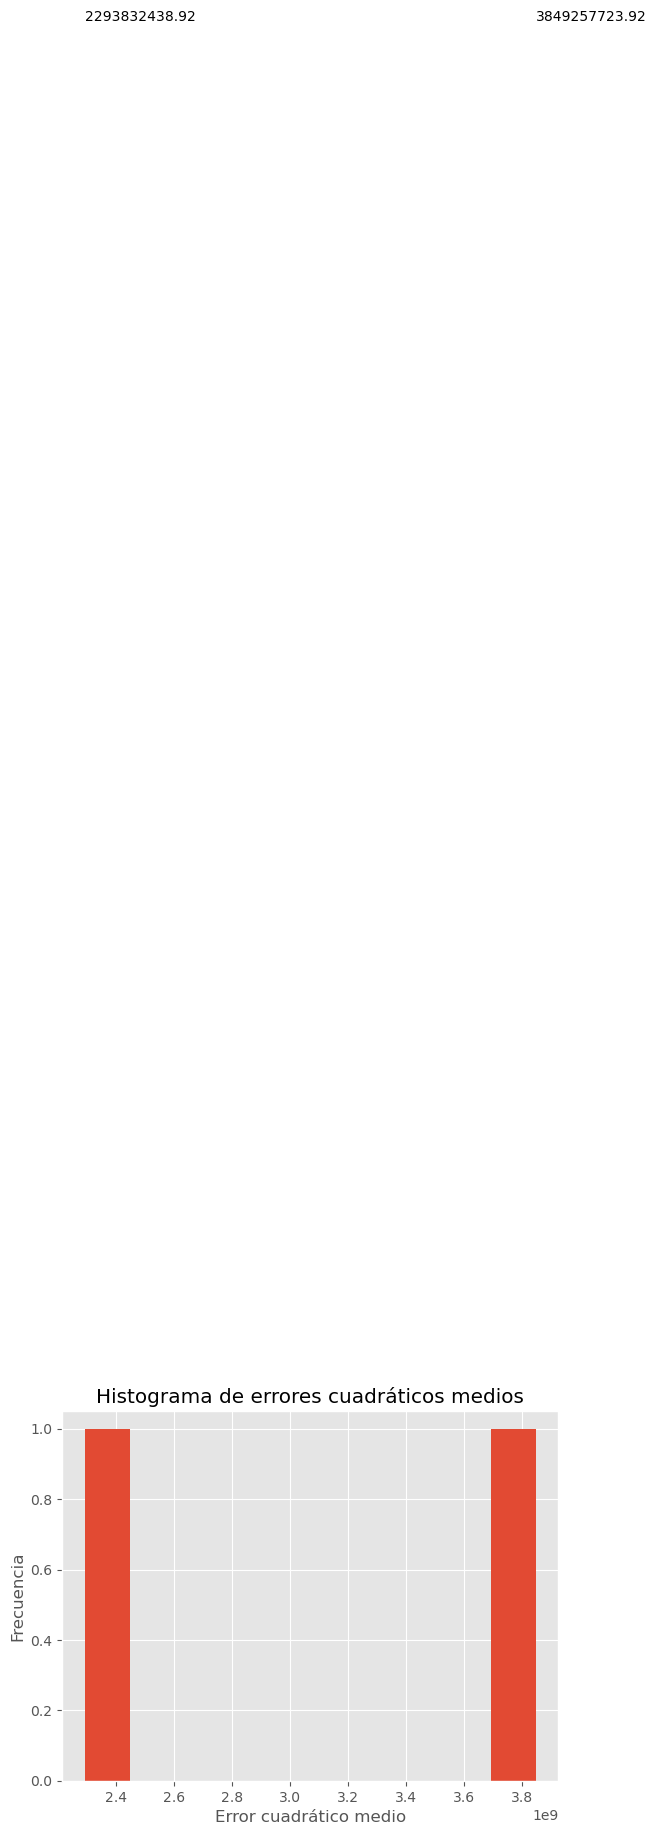

In [140]:
# Crear lista de errores cuadráticos medios
mse_list = [mse_m1, mse_m2]

# Graficar histograma
plt.hist(mse_list, bins=10)

# Agregar etiquetas y título
plt.xlabel('Error cuadrático medio')
plt.ylabel('Frecuencia')
plt.title('Histograma de errores cuadráticos medios')

# Agregar valores exactos de los errores cuadráticos medios
for i in range(len(mse_list)):
    plt.text(mse_list[i], 5, str(round(mse_list[i], 2)))

plt.show()
